Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



A Time Series:
  [1] 20.86 17.41 18.65  5.53 10.74 14.14 40.29 10.53 16.72 16.02 20.82 33.26
 [13] 12.69 12.84 18.72 21.96  7.51 12.55 11.80 14.28  4.83  8.69 11.30 11.96
 [25] 13.12 14.77 11.88 19.19 21.46 15.30 13.74 23.92  4.89 17.85  9.78 17.17
 [37] 23.21 16.67 23.29  8.45 17.49  8.82 11.18 19.85 15.27  6.25  8.11  8.94
 [49] 18.56 18.63  8.69  8.32 13.02 18.93 10.72 18.76 14.67 14.49 18.24 17.97
 [61] 27.16 12.06 20.26 31.28  7.40 22.57 17.45 12.78 16.22  4.13  7.59 10.63
 [73]  7.38 14.33 24.95  4.08 13.69 11.89 13.62 13.24 17.49  6.23  9.57  5.83
 [85] 15.37 12.31  7.98 26.81 12.91 23.66  7.58 26.32 16.54  9.26  6.54 17.45
 [97] 16.69 10.70 11.01 14.97 30.57 17.00 26.33 10.92 14.41 34.04  8.90  8.92
[109] 18.00  9.11 11.57  4.56  6.49 15.07 22.65

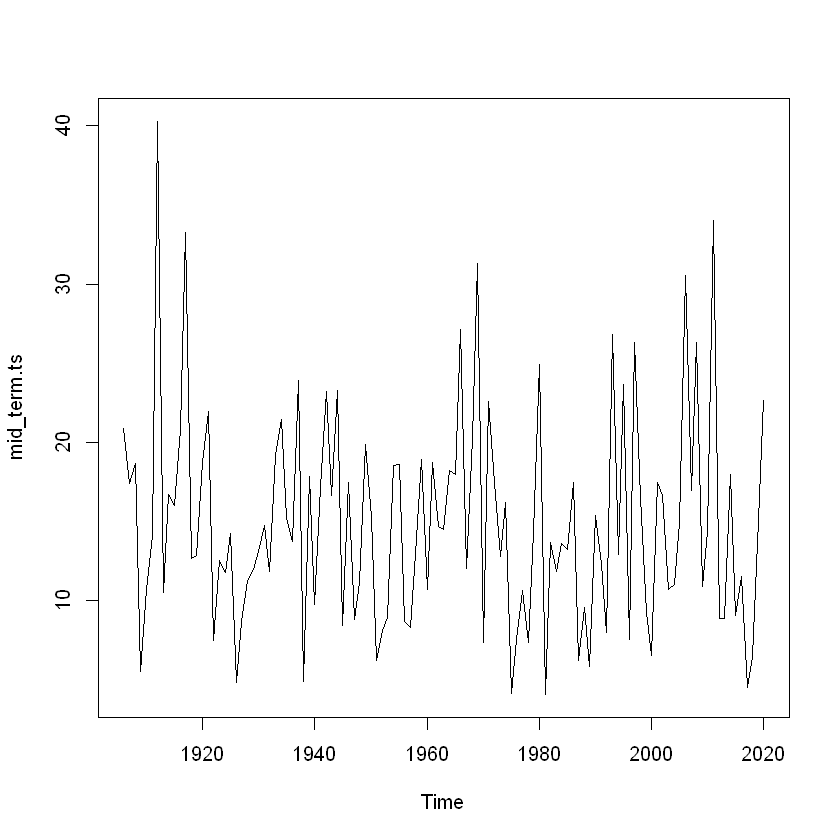

In [1]:
library(forecast)

mid_term <- read.csv("mid_term.csv")
mid_term.ts <- ts(mid_term$data_mid, start=1906, frequency=1)

# check original data
mid_term.ts
plot(mid_term.ts)


Forecast method: Simple exponential smoothing

Model Information:
Simple exponential smoothing 

Call:
 ses(y = mid_term.ts, h = 12) 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 14.8875 

  sigma:  6.9115

      AIC      AICc       BIC 
 994.2823  994.4985 1002.5171 

Error measures:
                        ME    RMSE      MAE       MPE     MAPE      MASE
Training set -0.0006018054 6.85113 5.322272 -25.26647 47.23021 0.6995803
                    ACF1
Training set -0.03272106

Forecasts:
     Point Forecast    Lo 80   Hi 80    Lo 95    Hi 95
2021       14.88746 6.030027 23.7449 1.341184 28.43374
2022       14.88746 6.030027 23.7449 1.341184 28.43374
2023       14.88746 6.030027 23.7449 1.341184 28.43374
2024       14.88746 6.030027 23.7449 1.341184 28.43374
2025       14.88746 6.030027 23.7449 1.341184 28.43374
2026       14.88746 6.030027 23.7449 1.341184 28.43374
2027       14.88746 6.030027 23.7449 1.341184 28.43374
2028       14.88746 6.030027 23.7449 1.

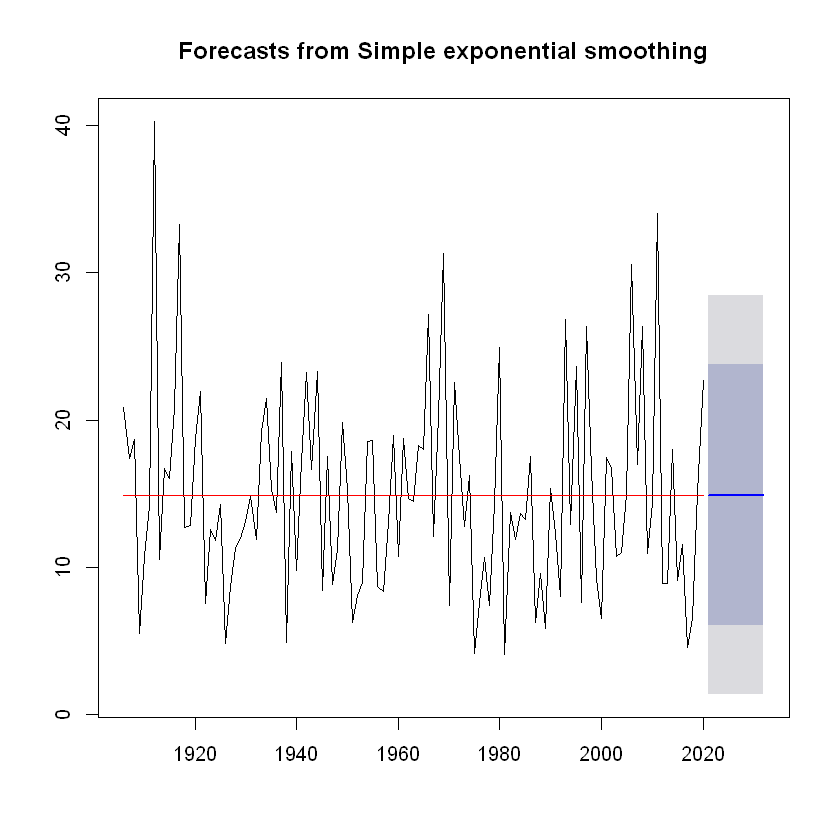


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(y = mid_term.ts, h = 12, damped = TRUE) 

  Smoothing parameters:
    alpha = 2e-04 
    beta  = 2e-04 
    phi   = 0.9111 

  Initial states:
    l = 18.6892 
    b = -0.4086 

  sigma:  6.9582

      AIC      AICc       BIC 
 998.7364  999.5142 1015.2060 

Error measures:
                     ME     RMSE      MAE       MPE    MAPE      MASE
Training set 0.01693205 6.805235 5.266724 -24.81333 46.6415 0.6922789
                    ACF1
Training set -0.04450482

Forecasts:
     Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
2021       14.50399 5.586727 23.42126 0.8662106 28.14178
2022       14.50397 5.586702 23.42124 0.8661856 28.14176
2023       14.50395 5.586679 23.42122 0.8661620 28.14173
2024       14.50393 5.586657 23.42120 0.8661394 28.14172
2025       14.50391 5.586637 23.42118 0.8661175 28.14170
2026       14.50389 5.586617 23.42117 0.8660961 28.14169
2027       14.50388 5.586598 2

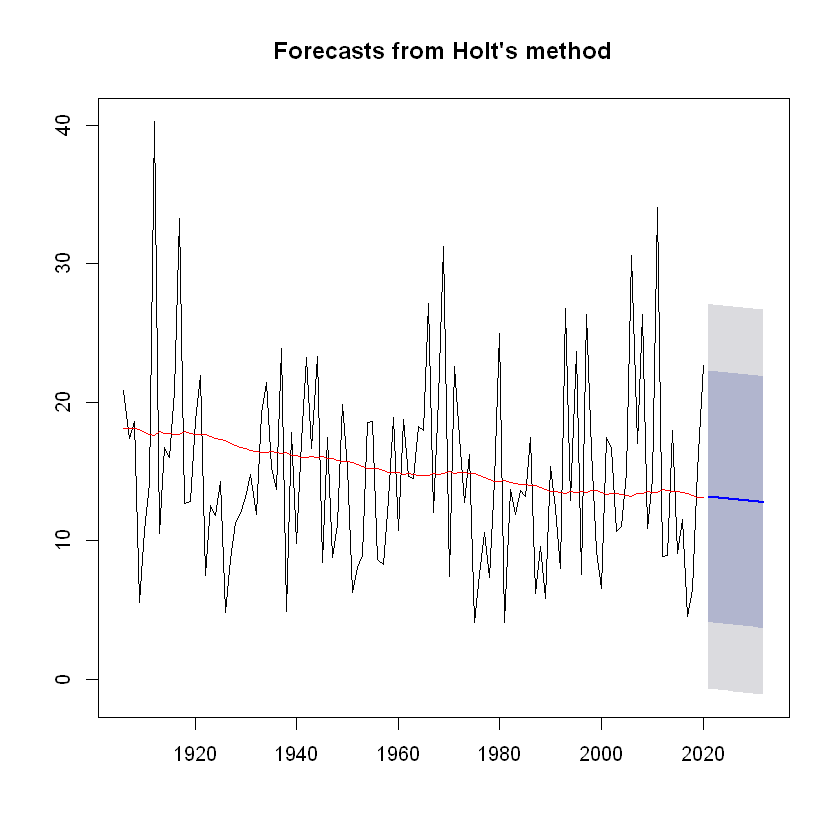

ETS(A,N,N) 

Call:
 ets(y = mid_term.ts) 

  Smoothing parameters:
    alpha = 1e-04 

  Initial states:
    l = 14.8831 

  sigma:  6.9115

      AIC      AICc       BIC 
 994.2824  994.4986 1002.5172 

Training set error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.003744176 6.851133 5.321782 -25.22992 47.21314 0.6995159
                    ACF1
Training set -0.03272076


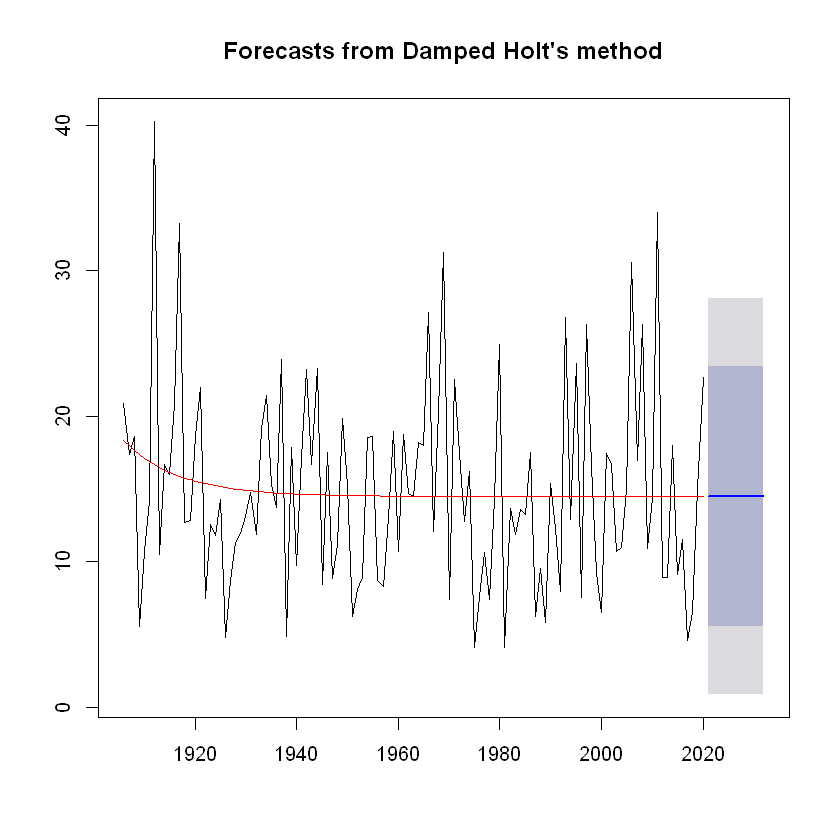

ERROR: Error in hw(mid_term.ts, seasonal = "multiplicative"): The time series should have frequency greater than 1.


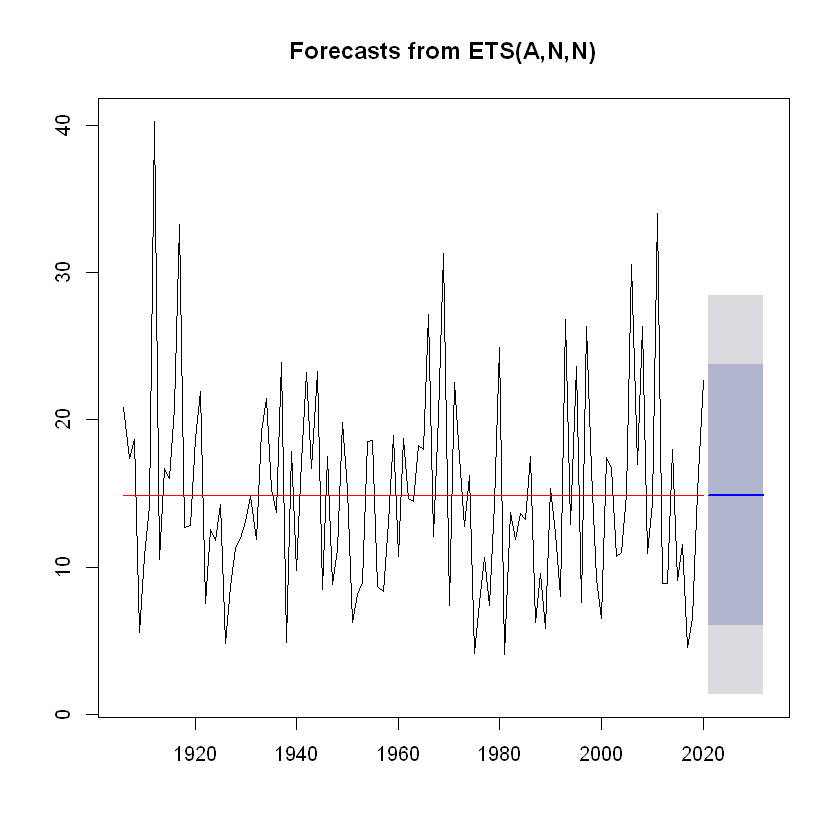

In [8]:
# apply ses
ses_data <- ses(mid_term.ts, h = 12)
summary(ses_data)
plot(ses_data)
lines(fitted(ses_data), type="l", col="red")


# apply holt_no damped
data_holt_1 <- holt(mid_term.ts, h = 12)
summary(data_holt_1)
plot(data_holt_1)
lines(fitted(data_holt_1), type="l", col="red")


# apply holt_ damped
data_holt_2 <- holt(mid_term.ts, h = 12, damped=TRUE)
summary(data_holt_2)
plot(data_holt_2)
lines(fitted(data_holt_2), type="l", col="red")

# apply ets
fit_data <- ets(mid_term.ts)
summary(fit_data)
plot(forecast(fit_data, h = 12))
lines(fitted(fit_data), type="l", col="red")

# apply holt winters' multiplicative method
#data_hw_multi <- hw(mid_term.ts, seasonal="multiplicative")
#summary(data_hw_multi)
#plot(data_hw_multi)
#lines(fitted(data_hw_multi), type="l", col="red")


# apply holt winters' additive method
#data_hw_add <- hw(mid_term.ts, seasonal="additive")
#summary(data_hw_add)
#plot(data_hw_add)
#lines(fitted(austourists_hw_add), type="l", col="red")



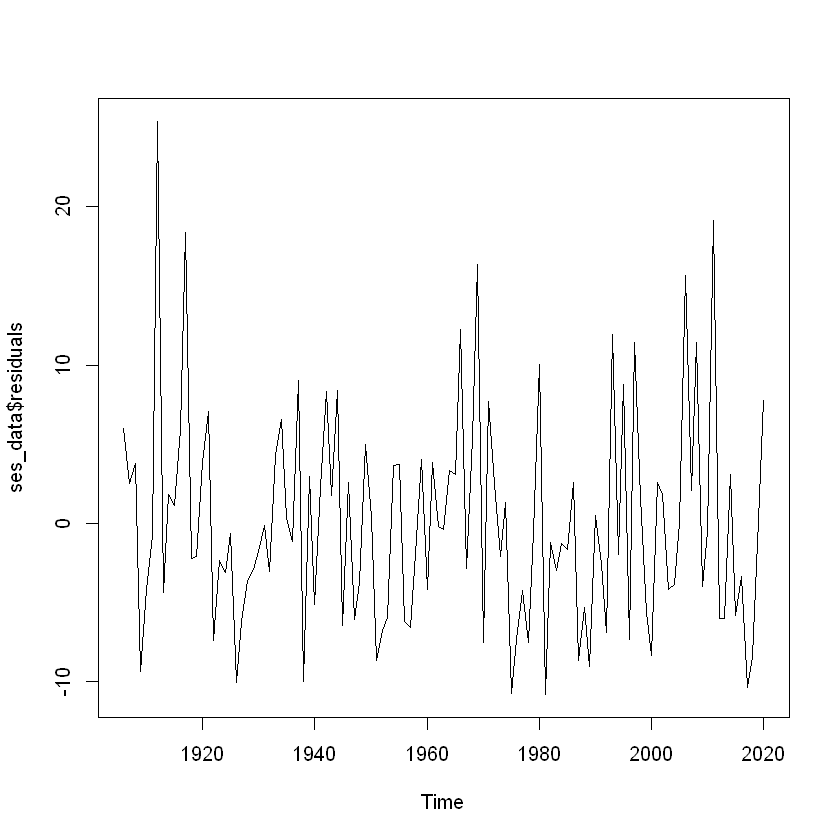

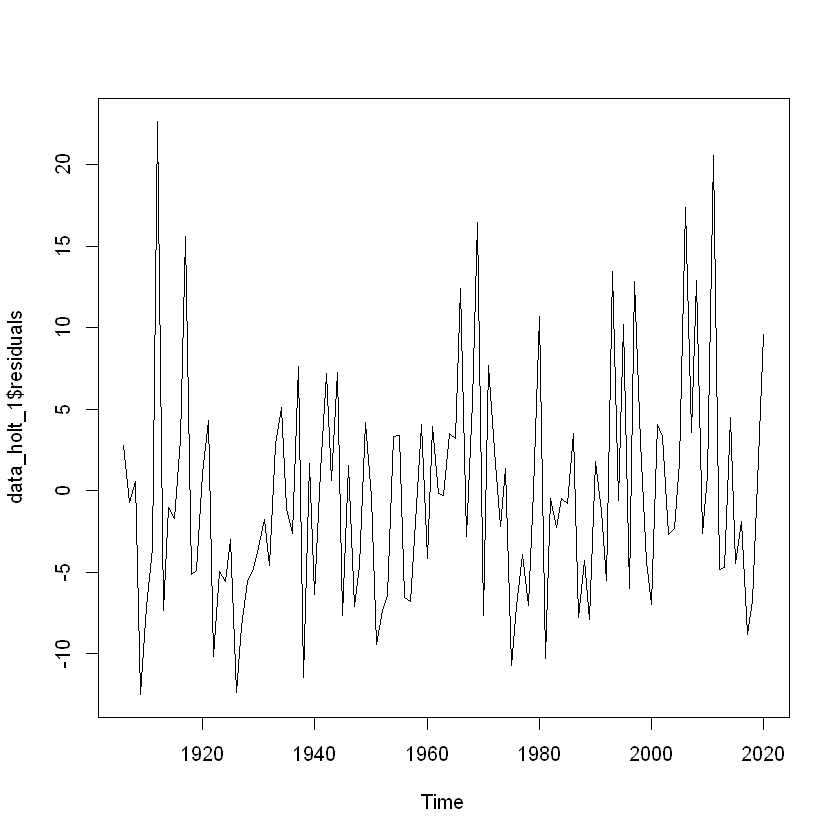

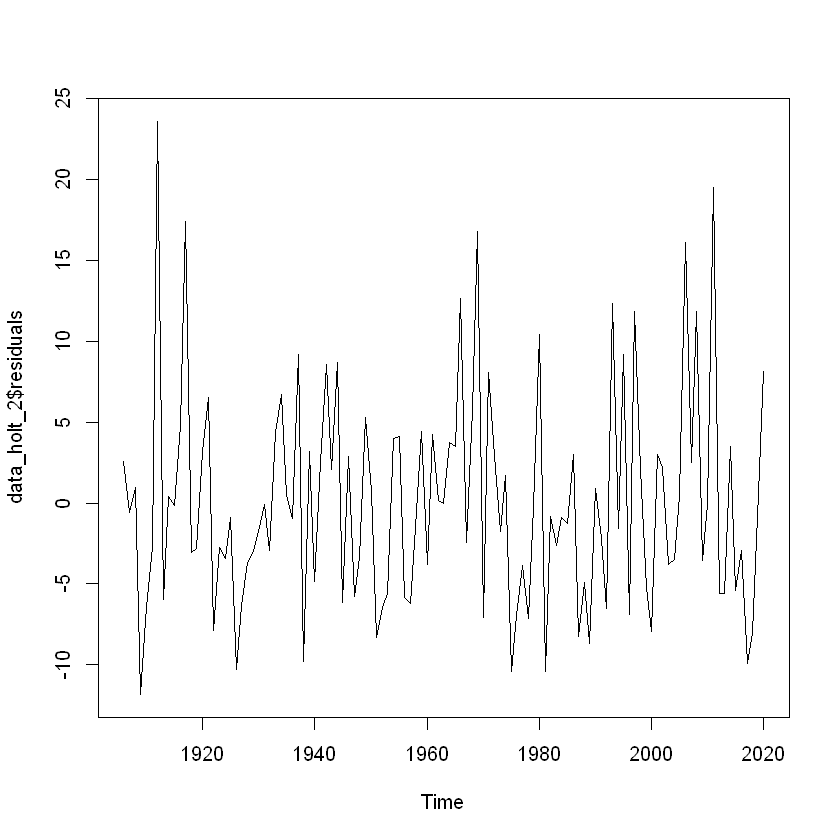

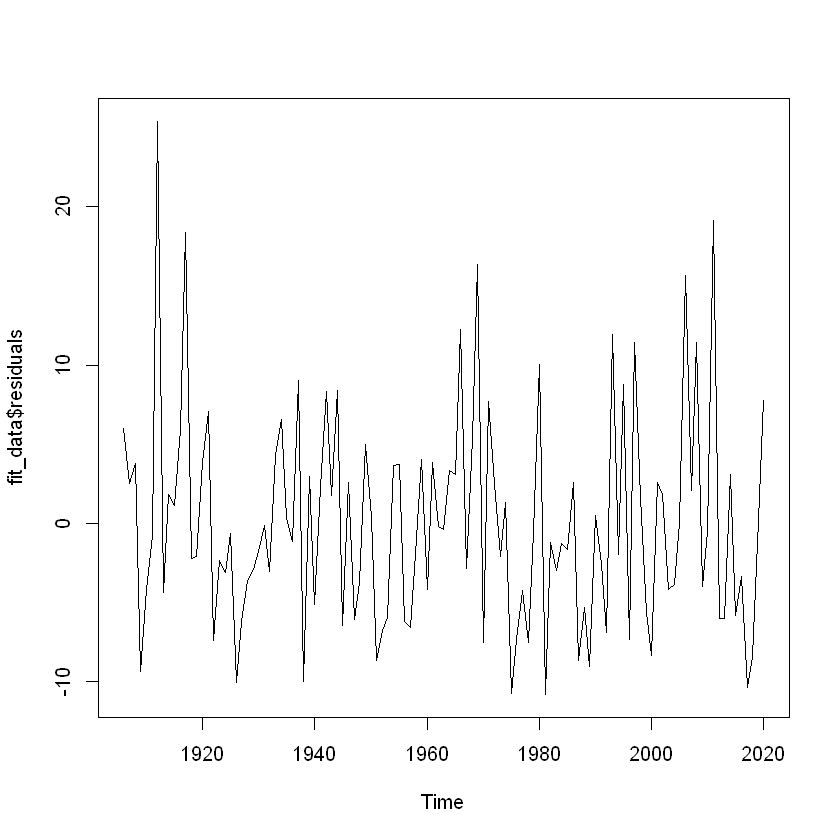

In [10]:
plot(ses_data$residuals)
plot(data_holt_1$residuals)
plot(data_holt_2$residuals)
plot(fit_data$residuals)